In [1]:
import numpy as np
import h5py
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import display
from PIL import Image
import ast
import time as tt

In [2]:
# get simulation time details
def convert_hecras_timedata(time_data):
    time_series = []
    for tstep in time_data:
        time_str = tstep.decode('UTF-8')  # Convert byte data to str
        time_stamp = datetime.strptime(time_str, '%d%b%Y %H:%M:%S')  # Convert to datetime
        time_series.append(time_stamp)  # Append timestep to timeseries

    time = np.array(time_series)  # Convert to numpy array
    return time

def get_timedata(path):
    hec = h5py.File(path, 'r')  # Open to read data
    # Get time data
    time_data = hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series'] \
        ['Time Date Stamp']

    time = convert_hecras_timedata(time_data)

    hec.close()  # Close

    return time

#### Read HDF file

In [8]:
hec_result_path = r"P:\Data_Transfer_USYD_Local\HEC_RAS_Results\Model_03_Events_97\NewOrleans_Pipe_Mod.p05.hdf"
hec = h5py.File(hec_result_path, 'r')
time_list = get_timedata(hec_result_path)
value = np.array(hec['Geometry']['2D Flow Areas'])[3]
value

np.str_('NewOrleans Metro')

### 1. Dynamic Features
#### 1.1 1D Node Features
##### To get the location of each 1D nodes, refer to the Nodes_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.1.1 Water Levels (units: fts)

In [9]:
WSE = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Water Surface'])
column_names = [str(i) for i in range(WSE.shape[1])]
WSE = pd.DataFrame(WSE, columns=column_names)
WSE.insert(0, "Time", time_list)
WSE = WSE.set_index('Time')
WSE

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,-11.012143,-11.575278,-13.944612,-12.519469,-5.757576,-8.214286,-12.552250,-14.412464,0.827586,-1.616667,...,-16.271544,-16.280157,-15.660000,-16.546667,-17.200001,-13.430769,-13.604546,-13.802667,-14.000000,-17.457088
2024-10-02 00:05:00,-11.012143,-11.575278,-13.944612,-12.519469,-5.757576,-8.214286,-12.552250,-14.412464,0.827586,-1.616667,...,-16.338303,-16.351931,-15.660000,-16.546667,-17.200001,-13.430769,-13.604546,-13.802667,-14.000000,-17.529156
2024-10-02 00:10:00,-11.012143,-11.575278,-13.944612,-12.519469,-5.757576,-8.214286,-12.552250,-14.412464,0.827586,-1.616667,...,-16.401209,-16.414900,-15.660000,-16.546667,-17.200001,-13.430769,-13.604546,-13.802667,-14.000000,-17.596155
2024-10-02 00:15:00,-11.012143,-11.575278,-13.944612,-12.519469,-5.757576,-8.214286,-12.552250,-14.412464,0.827586,-1.616667,...,-16.459391,-16.472237,-15.660000,-16.546667,-17.200001,-13.430769,-13.604546,-13.802667,-14.000000,-17.658998
2024-10-02 00:20:00,-11.012143,-11.575278,-13.944612,-12.519469,-5.757576,-8.214286,-12.552250,-14.412464,0.827586,-1.616667,...,-16.511887,-16.525467,-15.660000,-16.546667,-17.200001,-13.430769,-13.604546,-13.802667,-14.000000,-17.718739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,-9.281121,-9.281998,-9.282507,-9.856997,-5.757572,-8.214144,-11.464803,-12.973001,0.827603,-1.616389,...,-15.850259,-16.047329,-15.282381,-15.406957,-15.414258,-12.824739,-12.825854,-13.042232,-13.616110,-17.649214
2024-10-04 11:45:00,-9.286839,-9.287700,-9.288195,-9.861416,-5.757572,-8.214145,-11.467007,-12.975890,0.827603,-1.616390,...,-15.862790,-16.060015,-15.284253,-15.410866,-15.418090,-12.825971,-12.827087,-13.043277,-13.616618,-17.661911
2024-10-04 11:50:00,-9.292492,-9.293342,-9.293841,-9.865790,-5.757572,-8.214145,-11.469192,-12.978757,0.827603,-1.616390,...,-15.874881,-16.072306,-15.286317,-15.414717,-15.421944,-12.827195,-12.828315,-13.044322,-13.617121,-17.674335


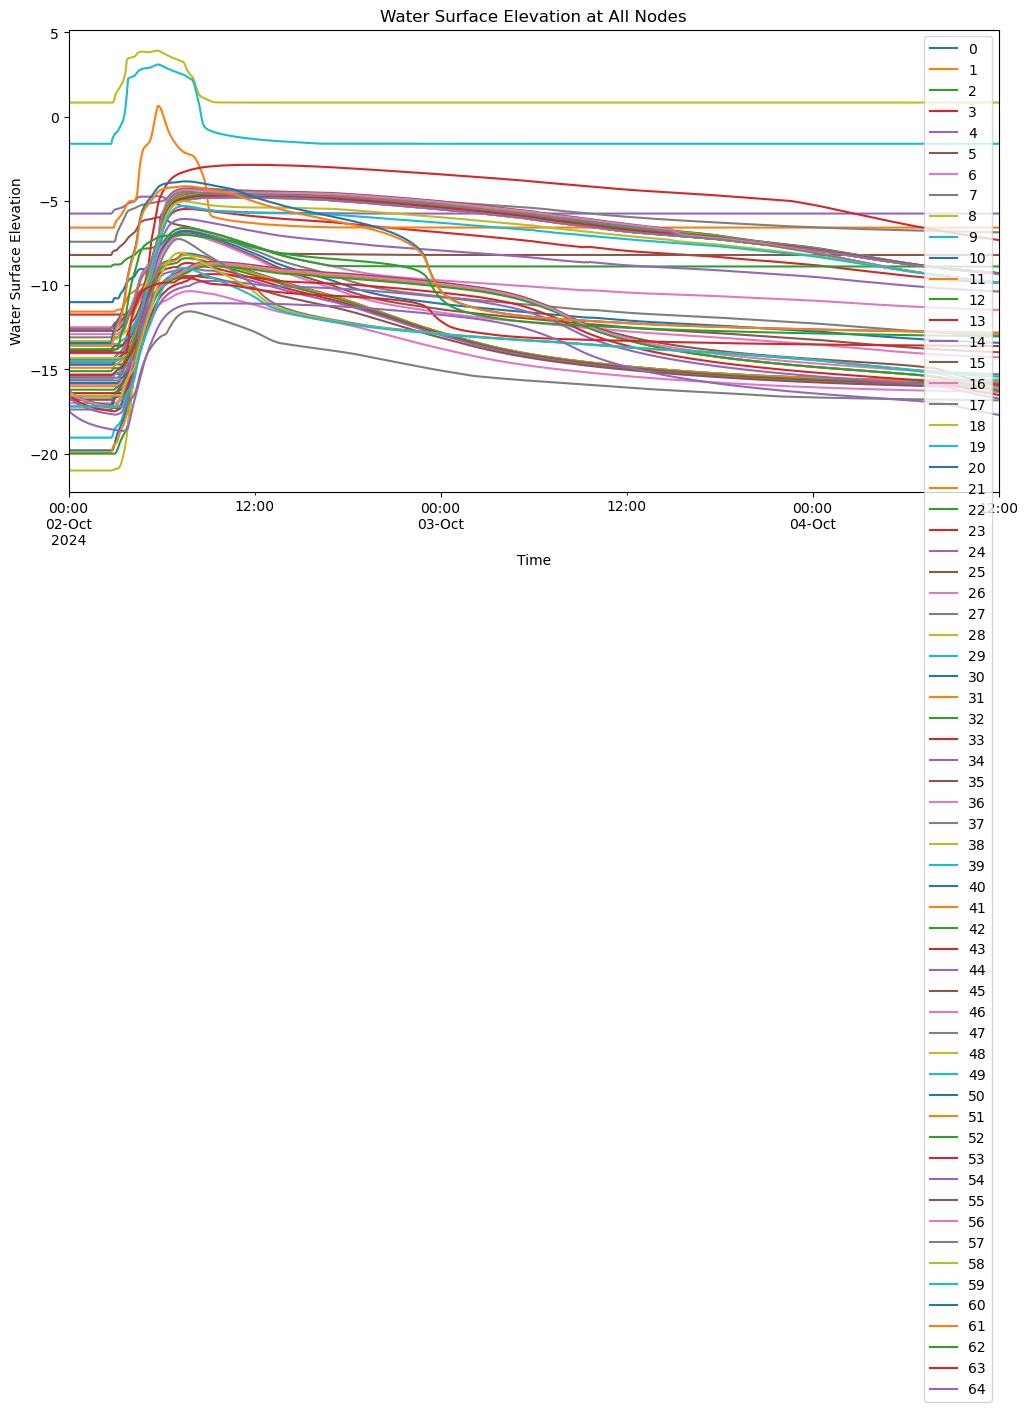

In [10]:
WSE.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Water Surface Elevation")
plt.title("Water Surface Elevation at All Nodes")
plt.show()

#### 1.1.2 Flow from 2D cells to 1D nodes (Units: ft^3/s)
##### To see the connections between 1D to 2D open Node1D_to_Node2D_Links.shp file

In [11]:
Inlet_Flow = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Nodes']['Drop Inlet Flow'])
column_names = [str(i) for i in range(Inlet_Flow.shape[1])]
Inlet_Flow = pd.DataFrame(Inlet_Flow, columns=column_names)
Inlet_Flow.insert(0, "Time", time_list)
Inlet_Flow = Inlet_Flow.set_index('Time')
Inlet_Flow

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,...,-0.000000,-0.000000,0.0,-0.000000,0.0,-0.000000,-0.000000,-0.0,0.0,0.0
2024-10-02 00:05:00,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,...,-0.000000,-0.000000,0.0,-0.000000,0.0,-0.000000,-0.000000,-0.0,0.0,0.0
2024-10-02 00:10:00,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,...,-0.000000,-0.000000,0.0,-0.000000,0.0,-0.000000,-0.000000,-0.0,0.0,0.0
2024-10-02 00:15:00,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,...,-0.000000,-0.000000,0.0,-0.000000,0.0,-0.000000,-0.000000,-0.0,0.0,0.0
2024-10-02 00:20:00,-0.000000e+00,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.0,...,-0.000000,-0.000000,0.0,-0.000000,0.0,-0.000000,-0.000000,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,6.119240e-08,-0.0,0.443033,0.074740,-0.0,-0.0,0.002171,0.277704,-0.0,-0.0,...,13.848598,0.973592,0.0,0.794731,0.0,0.123483,1.126800,-0.0,0.0,0.0
2024-10-04 11:45:00,6.103175e-08,-0.0,0.439272,0.074407,-0.0,-0.0,0.002166,0.276942,-0.0,-0.0,...,13.674588,0.965298,0.0,0.792136,0.0,0.123167,1.122981,-0.0,0.0,0.0
2024-10-04 11:50:00,6.087182e-08,-0.0,0.435567,0.074075,-0.0,-0.0,0.002160,0.276185,-0.0,-0.0,...,13.508554,0.957065,0.0,0.789555,0.0,0.122850,1.119182,-0.0,0.0,0.0


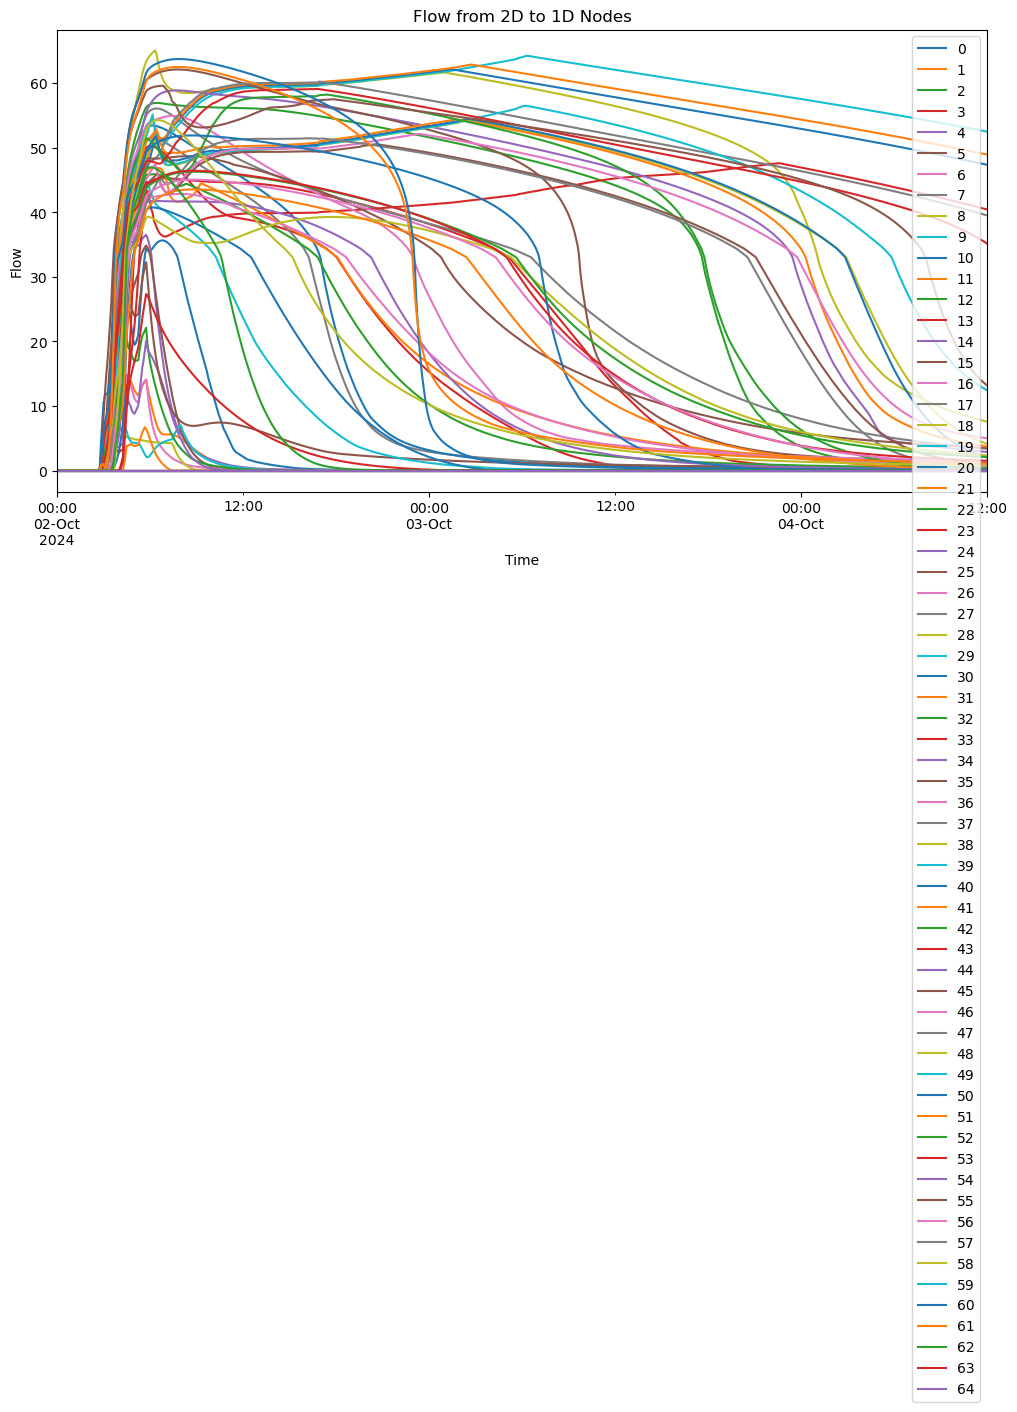

In [12]:
Inlet_Flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow from 2D to 1D Nodes")
plt.show()

#### 1.2 1D Link Features
##### To get the location of each 1D link, refer to the Links_1D.shp file (open in QGIS)
##### Column numbers correspond to FID attribute in the .shp file
#### 1.2.1 Velocity (units: ft/s)

In [13]:
vel_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel DS'])
vel_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Vel US'])
vel = (vel_DS + vel_US)/2
column_names = [str(i) for i in range(vel.shape[1])]
vel = pd.DataFrame(vel, columns=column_names)
vel.insert(0, "Time", time_list)
vel = vel.set_index('Time')
vel

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.287234,1.400316,0.204669,0.489790,0.000000,0.000000,0.000000,0.000000,0.000000,1.631833
2024-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.251679,1.371423,0.191898,0.469622,0.000000,0.000000,0.000000,0.000000,0.000000,1.598034
2024-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.222127,1.335470,0.190591,0.453528,0.000000,0.000000,0.000000,0.000000,0.000000,1.560478
2024-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.198853,1.309697,0.184669,0.439190,0.000000,0.000000,0.000000,0.000000,0.000000,1.527345
2024-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.173220,1.282833,0.179436,0.426847,0.000000,0.000000,0.000000,0.000000,0.000000,1.495061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,0.147876,1.911141,0.003538,2.400199,0.008211,1.916265,0.023209,0.017841,0.011639,0.101905,...,1.473635,1.646886,1.047220,1.153727,0.870150,0.383631,0.072075,0.595377,0.966880,1.711003
2024-10-04 11:45:00,0.147523,1.908205,0.003531,2.397664,0.008197,1.914173,0.023171,0.017805,0.011606,0.101519,...,1.466292,1.639583,1.043094,1.148573,0.872522,0.385673,0.072074,0.594567,0.965630,1.703116
2024-10-04 11:50:00,0.147126,1.905283,0.003523,2.395141,0.008184,1.912079,0.023133,0.017775,0.011570,0.101104,...,1.459178,1.632458,1.039265,1.143847,0.874227,0.385708,0.072071,0.593762,0.964391,1.695390


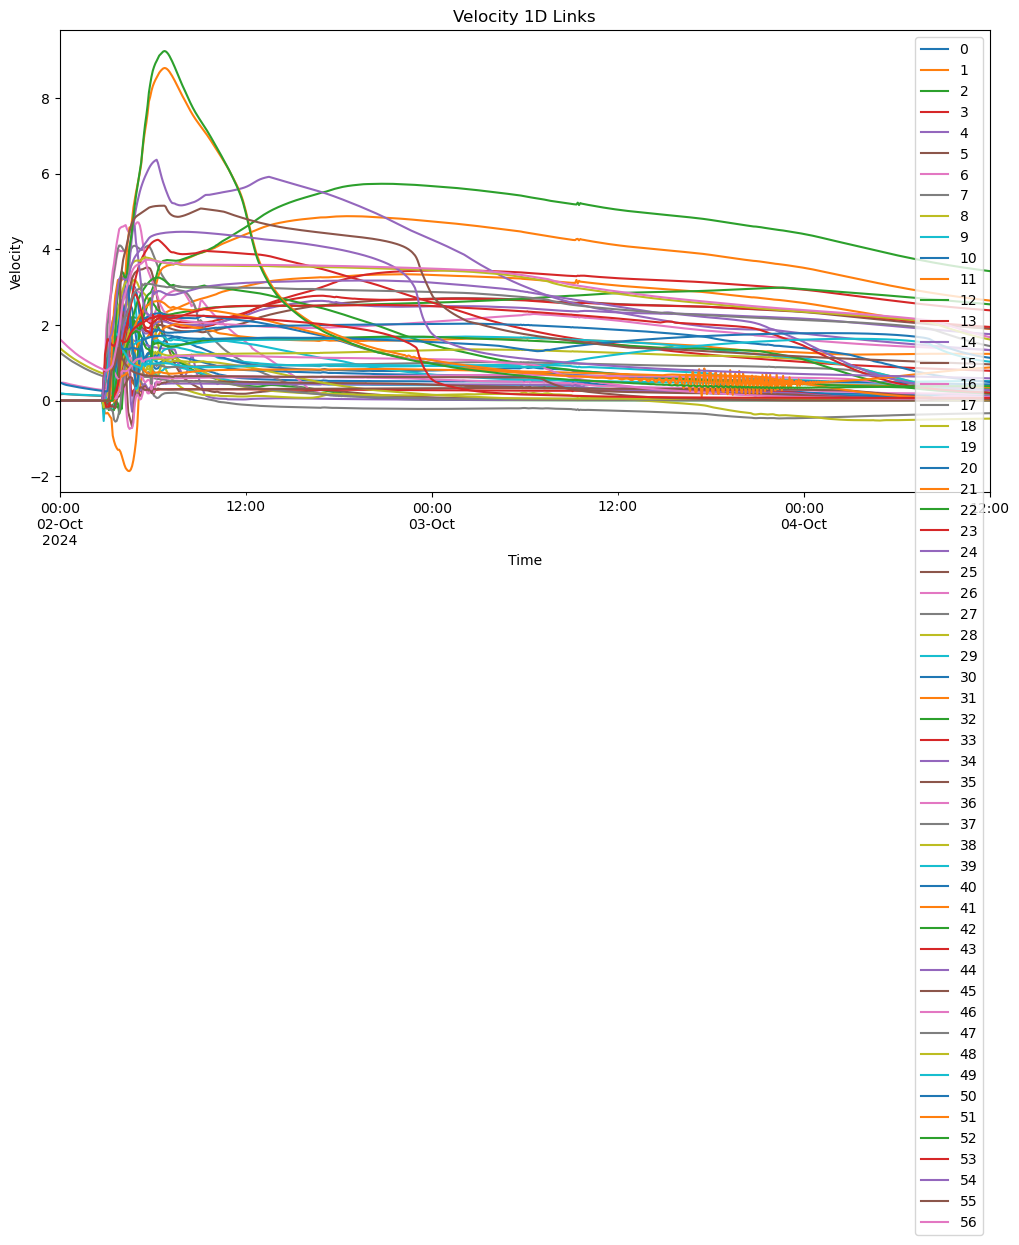

In [14]:
vel.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity 1D Links")
plt.show()

#### 1.2.2 Flow (Units: ft^3/s)

In [15]:
flow_DS = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow DS'])
flow_US = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['Pipe Networks']['Base']['Pipes']['Pipe Flow US'])
flow = (flow_DS + flow_US)/2
column_names = [str(i) for i in range(flow.shape[1])]
flow = pd.DataFrame(flow, columns=column_names)
flow.insert(0, "Time", time_list)
flow = flow.set_index('Time')
flow

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.723997,18.615101,2.261997,5.966733,0.000000,0.000000,0.000000,0.000000,0.000000,23.870022
2024-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.421009,17.330723,1.984353,5.395412,0.000000,0.000000,0.000000,0.000000,0.000000,22.263908
2024-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,14.270111,16.011587,1.849721,4.916317,0.000000,0.000000,0.000000,0.000000,0.000000,20.712070
2024-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.308120,14.925869,1.685949,4.510214,0.000000,0.000000,0.000000,0.000000,0.000000,19.328705
2024-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.386110,13.907124,1.542730,4.154541,0.000000,0.000000,0.000000,0.000000,0.000000,18.048447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,3.766674,51.377182,0.000003,51.970200,4.167375e-07,52.467209,0.000002,0.002499,0.029549,4.255279,...,20.202408,22.101295,14.239346,15.870454,10.691990,11.766090,0.128531,1.278691,1.316905,23.033974
2024-10-04 11:45:00,3.746457,51.221409,0.000003,51.809269,4.150326e-07,52.303406,0.000002,0.002476,0.029263,4.230091,...,19.918205,21.802187,14.051682,15.653259,10.686428,11.794660,0.128191,1.274439,1.312593,22.714531
2024-10-04 11:50:00,3.725189,51.066750,0.000003,51.649662,4.133374e-07,52.140800,0.000002,0.002464,0.028925,4.204249,...,19.643486,21.511814,13.873392,15.447374,10.654533,11.761757,0.127852,1.270212,1.308319,22.403824


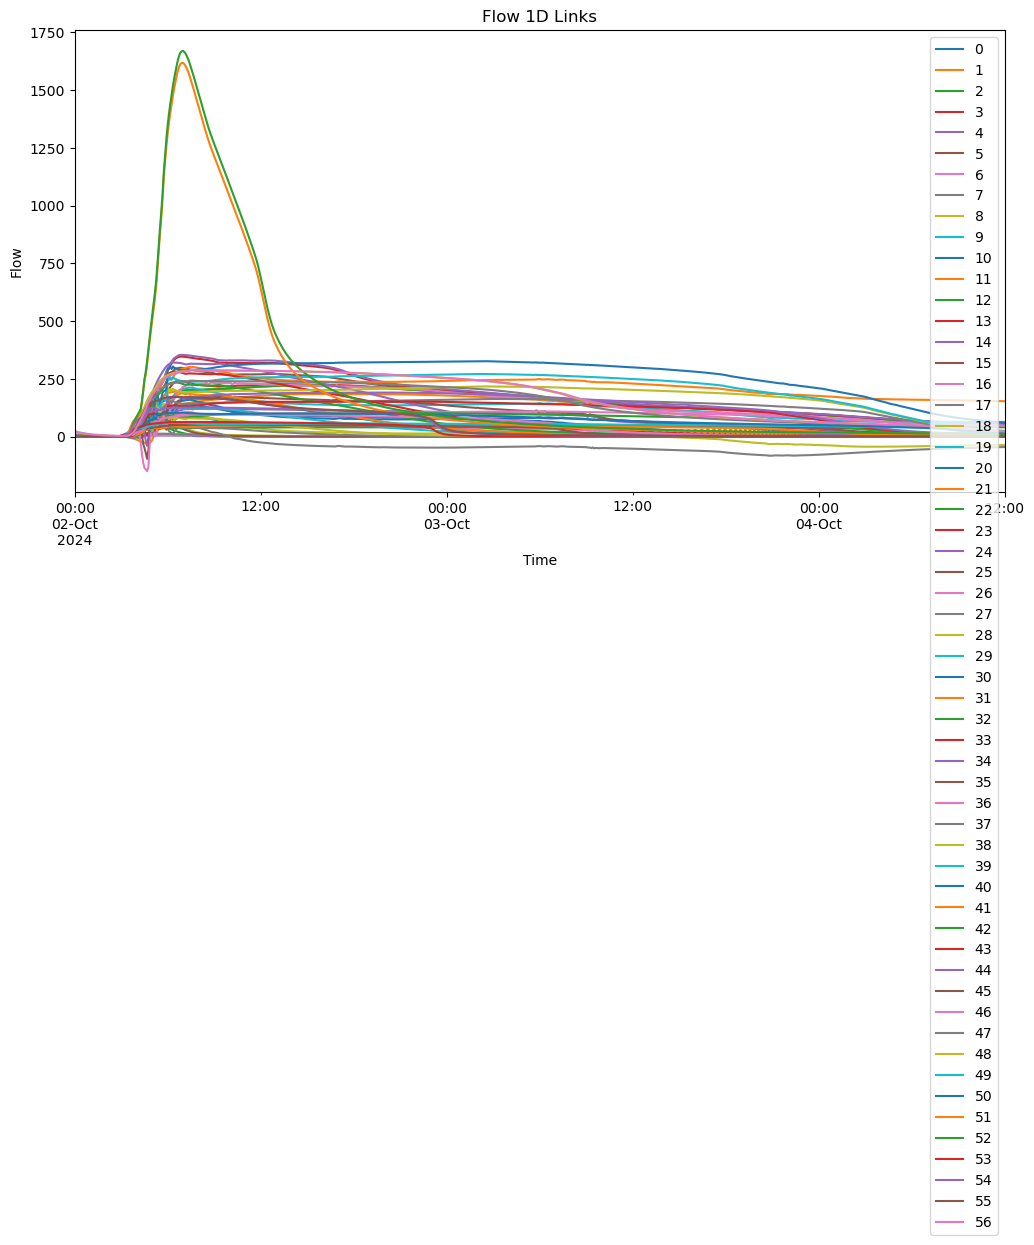

In [16]:
flow.plot(figsize=(12, 6))
plt.xlabel("Time")
plt.ylabel("Flow")
plt.title("Flow 1D Links")
plt.show()

#### 1.3 2D Node features
##### To see node locations open and see Nodes_2D.shp, type = boundary are boundary nodes
#### 1.3.1 Water Level (Units: ft)

In [17]:
wl=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Water Surface'])
column_names = [str(i) for i in range(wl.shape[1])]
df = pd.DataFrame(wl, columns=column_names)
df.insert(0, "Time", time_list)
df = df.set_index('Time')
df

,0,1,2,3,4,5,6,7,8,9,...,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,1.325862,1.017347,0.959952,0.906171,0.572864,1.343750,0.410104,1.007679,1.159483,0.347559,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:05:00,1.325862,1.017347,0.959952,0.906171,0.572864,1.343750,0.410104,1.007679,1.159483,0.347559,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:10:00,1.325862,1.017347,0.959952,0.906171,0.572864,1.343750,0.410104,1.007679,1.159483,0.347559,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:15:00,1.325862,1.017347,0.959952,0.906171,0.572864,1.343750,0.410104,1.007679,1.159483,0.347559,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:20:00,1.325862,1.017347,0.959952,0.906171,0.572864,1.343750,0.410104,1.007679,1.159483,0.347559,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,1.414748,1.226379,1.226379,0.931297,0.658446,1.359441,0.983142,1.064768,1.226384,1.226378,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042351,2.107118,11.343376,13.71875
2024-10-04 11:45:00,1.414747,1.226258,1.226258,0.931278,0.658393,1.359430,0.983140,1.064763,1.226263,1.226258,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042220,2.105906,11.343376,13.71875
2024-10-04 11:50:00,1.414745,1.226138,1.226138,0.931259,0.658341,1.359419,0.983138,1.064758,1.226143,1.226137,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042088,2.104693,11.343376,13.71875


#### 1.3.2 Water Volume (ft^3)

In [18]:
vol_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Cell Volume'])
column_names = [str(i) for i in range(vol_data.shape[1])]
vol_df = pd.DataFrame(vol_data, columns=column_names)
vol_df.insert(0, "Time", time_list)
vol_df = vol_df.set_index('Time')
vol_df

,0,1,2,3,4,5,6,7,8,9,...,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
2024-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,3.753505,-3.422942,11.343376,13.71875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,98.790962,132.490753,973.582092,10.079388,23.557898,5.561042,540.194946,22.835535,26.760866,1428.359619,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042351,2.107118,11.343376,13.71875
2024-10-04 11:45:00,98.787979,132.335526,972.885376,10.071775,23.543413,5.557174,540.189453,22.833513,26.712593,1427.932983,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042220,2.105906,11.343376,13.71875
2024-10-04 11:50:00,98.785004,132.180725,972.190491,10.064181,23.528965,5.553315,540.184021,22.831499,26.664452,1427.507446,...,18.154484,-18.0,6.188656,15.326073,0.953093,0.858805,4.042088,2.104693,11.343376,13.71875


#### 1.3.3 Rainfall (Units: inch)

In [19]:
# rainfall is cumulative; convert to DataFrame
rainfall = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']
                    ['Unsteady Time Series']['2D Flow Areas'][value]
                    ['Cell Cumulative Precipitation Depth'])

column_names = [str(i) for i in range(rainfall.shape[1])]
rain_df = pd.DataFrame(rainfall, columns=column_names)
rain_df.insert(0, "Time", time_list)
rain_df.set_index("Time", inplace=True)

# 🔻 Compute incremental rainfall (difference between time steps)
rain_increment = rain_df.diff()    # difference between rows
rain_increment.iloc[0] = rain_df.iloc[0]   # first timestep stays as-is

rain_increment

,0,1,2,3,4,5,6,7,8,9,...,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


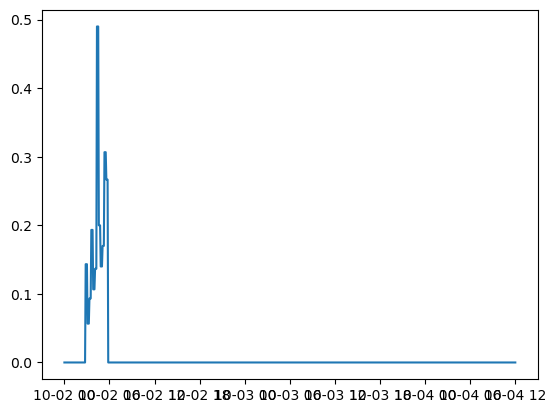

In [20]:
plt.plot(rain_increment['1'])

#### 1.4 2D Link Features
#### 1.4.1 Velocity (Units: ft/s)

In [21]:
vel=np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output'] \
                       ['Unsteady Time Series']['2D Flow Areas'][value]['Face Velocity'])
column_names = [str(i) for i in range(vel.shape[1])]
vel_df = pd.DataFrame(vel, columns=column_names)
vel_df.insert(0, "Time", time_list)
vel_df = vel_df.set_index('Time')
vel_df

,0,1,2,3,4,5,6,7,8,9,...,41934,41935,41936,41937,41938,41939,41940,41941,41942,41943
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,0.057065,-0.015428,-0.062511,-0.025991,0.006249,-0.004118,-0.027535,0.0,0.059356,-0.009023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:45:00,0.056880,-0.015380,-0.062309,-0.025908,0.006231,-0.004104,-0.027454,0.0,0.059162,-0.008993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:50:00,0.056698,-0.015332,-0.062108,-0.025825,0.006213,-0.004092,-0.027373,0.0,0.058971,-0.008963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.4.2 Flow (Units: ft^3/s)

In [22]:
flow_data = np.array(hec['Results']['Unsteady']['Output']['Output Blocks']['Base Output']['Unsteady Time Series']['2D Flow Areas'][value]['Face Flow'])
column_names = [str(i) for i in range(flow_data.shape[1])]
flow_df = pd.DataFrame(flow_data, columns=column_names)
flow_df.insert(0, "Time", time_list)
flow_df = flow_df.set_index('Time')
flow_df

,0,1,2,3,4,5,6,7,8,9,...,41934,41935,41936,41937,41938,41939,41940,41941,41942,41943
Time,,,,,,,,,,,,,,,,,,,,,
2024-10-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 11:40:00,16.615602,-9.006962,-6.561562,-4.686043,3.638969,-2.717229,-11.611612,0.0,19.065544,-5.167171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:45:00,16.561932,-8.978865,-6.540316,-4.671103,3.628360,-2.708381,-11.577138,0.0,19.003347,-5.149797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04 11:50:00,16.508858,-8.951360,-6.519297,-4.656271,3.618073,-2.699853,-11.542922,0.0,18.941990,-5.132985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Notes
##### Open each shapefile in Geometry folder in QGIS to visualise the numerical computational mesh/nodes/links. 
##### You may see number of nodes in Nodes_2D.shp is higher than the Mesh_2D.shp
##### This is because HEC-RAS adds additional cells called ghost cells. Except the boundary nodes all other ghost cells can be removed.
##### Similarly all links connecting to or starting from ghost cells can be removed, except those connected to boundary nodes.
##### Boundary nodes are given as type = boundary in Nodes_2D.shp file
##### Following code gives all ghost cell indexes including boundary nodes


In [23]:
# identify ghost cells
min_elevation = np.array(hec['Geometry']['2D Flow Areas'][value]['Cells Minimum Elevation']) 
Ghost_cells_idx = np.where(np.isnan(min_elevation))[0]
Ghost_cells_idx

array([19711, 19712, 19713, 19714, 19715, 19716, 19717, 19718, 19719,
       19720, 19721, 19722, 19723, 19724, 19725, 19726, 19727, 19728,
       19729, 19730, 19731, 19732, 19733, 19734, 19735, 19736, 19737,
       19738, 19739, 19740, 19741, 19742, 19743, 19744, 19745, 19746,
       19747, 19748, 19749, 19750, 19751, 19752, 19753, 19754, 19755,
       19756, 19757, 19758, 19759, 19760, 19761, 19762, 19763, 19764,
       19765, 19766, 19767, 19768, 19769, 19770, 19771, 19772, 19773,
       19774, 19775, 19776, 19777, 19778, 19779, 19780, 19781, 19782,
       19783, 19784, 19785, 19786, 19787, 19788, 19789, 19790, 19791,
       19792, 19793, 19794, 19795, 19796, 19797, 19798, 19799, 19800,
       19801, 19802, 19803, 19804, 19805, 19806, 19807, 19808, 19809,
       19810, 19811, 19812, 19813, 19814, 19815, 19816, 19817, 19818,
       19819, 19820, 19821, 19822, 19823, 19824, 19825, 19826, 19827,
       19828, 19829, 19830, 19831, 19832, 19833, 19834, 19835, 19836,
       19837, 19838,